In [8]:
import matplotlib.pyplot as plt
import numpy as np
from pysr import *

In [10]:
size = 55

plt.rcParams.update({
    # taglia della figura
    'figure.figsize': (11,8),

    # font
    'text.usetex': True,
    'font.family': 'cmr10',
    'mathtext.fontset': 'cm',
    'axes.formatter.use_mathtext': True,

    # assi
    'axes.labelsize': size,
    'axes.titlesize': size,
    'axes.linewidth': 2,

    # ticks
    'xtick.labelsize': size,
    'ytick.labelsize': size,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 8,
    'ytick.major.size': 8,
    'ytick.major.pad': 5,

    # legenda
    'legend.loc': 'best',
    'legend.fontsize': size,

    # plots
    'lines.linewidth': 1.6,
    'scatter.marker': 'o',
    'lines.markersize': 8,
    'scatter.edgecolors': 'black',
})

In [7]:
# eseguo test PySR con noise ad ampiezza 2
'''
size = 100
amp = 3

# training dataset
x = np.random.normal(loc=0, scale=5, size=(size,1))
noise = np.random.normal(loc=0, scale=amp, size=(size,1))
y = 10 * np.cos(x) + x ** 2 - 2 + noise
'''

'\nsize = 100\namp = 3\n\n# training dataset\nx = np.random.normal(loc=0, scale=5, size=(size,1))\nnoise = np.random.normal(loc=0, scale=amp, size=(size,1))\ny = 10 * np.cos(x) + x ** 2 - 2 + noise\n'

In [786]:
'''
model = PySRRegressor(
    binary_operators = ["+", "-", "*", "/"],
    unary_operators = ["cos"],
    equation_file = '../models/test_noise_' + str(amp)+ '.csv'
)
model.fit(x, y)
print(model.latex())
'''

'\nmodel = PySRRegressor(\n    binary_operators = ["+", "-", "*", "/"],\n    unary_operators = ["cos"],\n    equation_file = \'../models/test_noise_\' + str(amp)+ \'.csv\'\n)\nmodel.fit(x, y)\nprint(model.latex())\n'

In [787]:
'''
# datset ideale
x_id = np.linspace(np.min(x), np.max(x), 1000)
y_id = 10 * np.cos(x_id) + x_id ** 2 - 2

# importo il modello
model = PySRRegressor().from_file('../models/test_noise_' + str(amp)+ '.pkl')

plt.figure(figsize=(12,10))

plt.plot(x_id, y_id, color='black', label='Target: $y = x^2 + 10 \, \cos(x) - 2$')
plt.scatter(x, y, color='magenta', edgecolors='black', label='Training dataset con rumore gaussiano $(\sigma = ' +str(amp)+ ')$')
plt.scatter(x, model.predict(x), color='cyan', edgecolors='black', label='Predizione: $y = x^2 + 9.99 \, \cos(x) - 2.15$')


ylim = plt.ylim()
plt.ylim(ylim[0], np.max(y)+50)

plt.xlabel('$x$')
plt.ylabel('$y$')

plt.legend(loc='upper left')
plt.savefig('../plots/PySR_test.pdf')
plt.show()
'''

"\n# datset ideale\nx_id = np.linspace(np.min(x), np.max(x), 1000)\ny_id = 10 * np.cos(x_id) + x_id ** 2 - 2\n\n# importo il modello\nmodel = PySRRegressor().from_file('../models/test_noise_' + str(amp)+ '.pkl')\n\nplt.figure(figsize=(12,10))\n\nplt.plot(x_id, y_id, color='black', label='Target: $y = x^2 + 10 \\, \\cos(x) - 2$')\nplt.scatter(x, y, color='magenta', edgecolors='black', label='Training dataset con rumore gaussiano $(\\sigma = ' +str(amp)+ ')$')\nplt.scatter(x, model.predict(x), color='cyan', edgecolors='black', label='Predizione: $y = x^2 + 9.99 \\, \\cos(x) - 2.15$')\n\n\nylim = plt.ylim()\nplt.ylim(ylim[0], np.max(y)+50)\n\nplt.xlabel('$x$')\nplt.ylabel('$y$')\n\nplt.legend(loc='upper left')\nplt.savefig('../plots/PySR_test.pdf')\nplt.show()\n"

In [788]:
ni = 4000
comp = 40
pop = 120

nm = 10
nk = 100
nz = 20
nc = 200

nmv = 21
nkv = 201
nzv = 41
ncv = 301

In [789]:
# i plot di questo notebook hanno un k fisso, in unità di h/Mpc
kk = np.logspace(-4, np.log10(3), nk)*0.67810
zz = np.linspace(0, 5, nz)

kkv = np.logspace(-4, np.log10(3), nkv)*0.67810
zzv = np.linspace(0, 5, nzv)

## Differenze $\mu$

In [790]:
model_VBCh_2 = PySRRegressor().from_file('../models/mu_VBCh(' +str(ni)+ ',' +str(comp)+ ',' +str(pop)+ ').pkl')
print(model_VBCh_2.get_best())
print(model_VBCh_2.latex())

Checking if ../models/mu_VBCh(4000,40,120).pkl exists...
Loading model from ../models/mu_VBCh(4000,40,120).pkl
complexity                                                      23
loss                                                      0.000001
score                                                     0.279999
equation         exp((x0 / ((-1.0821666 - (1.1270447 ^ ((x1 / (...
sympy_format     exp(x0*x2/(-1.1270447**(x2 + x1/x0**(0.5324436...
lambda_format    PySRFunction(X=>exp(x0*x2/(-1.1270447**(x2 + x...
Name: 15, dtype: object
e^{\frac{x_{0} x_{2}}{- 1.13^{x_{2} + x_{0}^{- \frac{0.532}{x_{5}}} x_{1}} - \log{\left(x_{3} + x_{4} \right)} - 1.08}}


In [791]:
# preparo il plot delle differenze con il training dataset

diffk_VBCh_2 = np.zeros([nc*nz,nk])
diffz_VBCh_2 = np.zeros([nc*nk,nz])

data_VBCh_2 = np.load('../files/data_VBCh_[' +str(nk)+ ',' +str(nz)+ ',comb=' +str(nc)+ '].npy')

testk_VBCh_2 = data_VBCh_2[np.argsort(data_VBCh_2[:, 1])]
for i in range(nk) :
    diffk_VBCh_2[:,i] = 100*np.abs(1-model_VBCh_2.predict(testk_VBCh_2[i*nc*nz:i*nc*nz+nc*nz,:-1])/testk_VBCh_2[i*nc*nz:i*nc*nz+nc*nz,-1])
diffk_VBCh_2 = np.sort(diffk_VBCh_2, axis=0)

testz_VBCh_2 = data_VBCh_2[np.argsort(data_VBCh_2[:, 2])]
for i in range(nz) :
    diffz_VBCh_2[:,i] = 100*np.abs(1-model_VBCh_2.predict(testz_VBCh_2[i*nc*nk:i*nc*nk+nc*nk,:-1])/testz_VBCh_2[i*nc*nk:i*nc*nk+nc*nk,-1])
diffz_VBCh_2 = np.sort(diffz_VBCh_2, axis=0)


In [792]:
# preparo il plot delle differenze con il validation dataset

data_VBCh_v2 = np.load('../files/data-val_VBCh_[' +str(nkv)+ ',' +str(nzv)+ ',comb=' +str(ncv)+ '].npy')

diffk_VBCh_v2 = np.zeros([ncv*nzv,nkv])
diffz_VBCh_v2 = np.zeros([ncv*nkv,nzv])

testk_VBCh_v2 = data_VBCh_v2[np.argsort(data_VBCh_v2[:, 1])]
for i in range(nkv) :
    diffk_VBCh_v2[:,i] = 100*np.abs(1-model_VBCh_2.predict(testk_VBCh_v2[i*ncv*nzv:i*ncv*nzv+ncv*nzv,:-1])/testk_VBCh_v2[i*ncv*nzv:i*ncv*nzv+ncv*nzv,-1])
diffk_VBCh_v2 = np.sort(diffk_VBCh_v2, axis=0)

testz_VBCh_v2 = data_VBCh_v2[np.argsort(data_VBCh_v2[:, 2])]
for i in range(nzv) :
    diffz_VBCh_v2[:,i] = 100*np.abs(1-model_VBCh_2.predict(testz_VBCh_v2[i*ncv*nkv:i*ncv*nkv+ncv*nkv,:-1])/testz_VBCh_v2[i*ncv*nkv:i*ncv*nkv+ncv*nkv,-1])
diffz_VBCh_v2 = np.sort(diffz_VBCh_v2, axis=0)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ll/brfzdrlx3nndb4spv5812khr0000gn/T/ipykernel_10785/1762987785.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
/var/folders/ll/brfzdrlx3nndb4spv5812khr0000gn/T/ipykernel_10785/1762987785.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels([0,1,2,3,4,5])
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ll/brfzdrlx3nndb4spv5812khr0000gn/T/ipykernel_10785/1762987785.py:33: UserWarning: set_ticklabels() should only be u

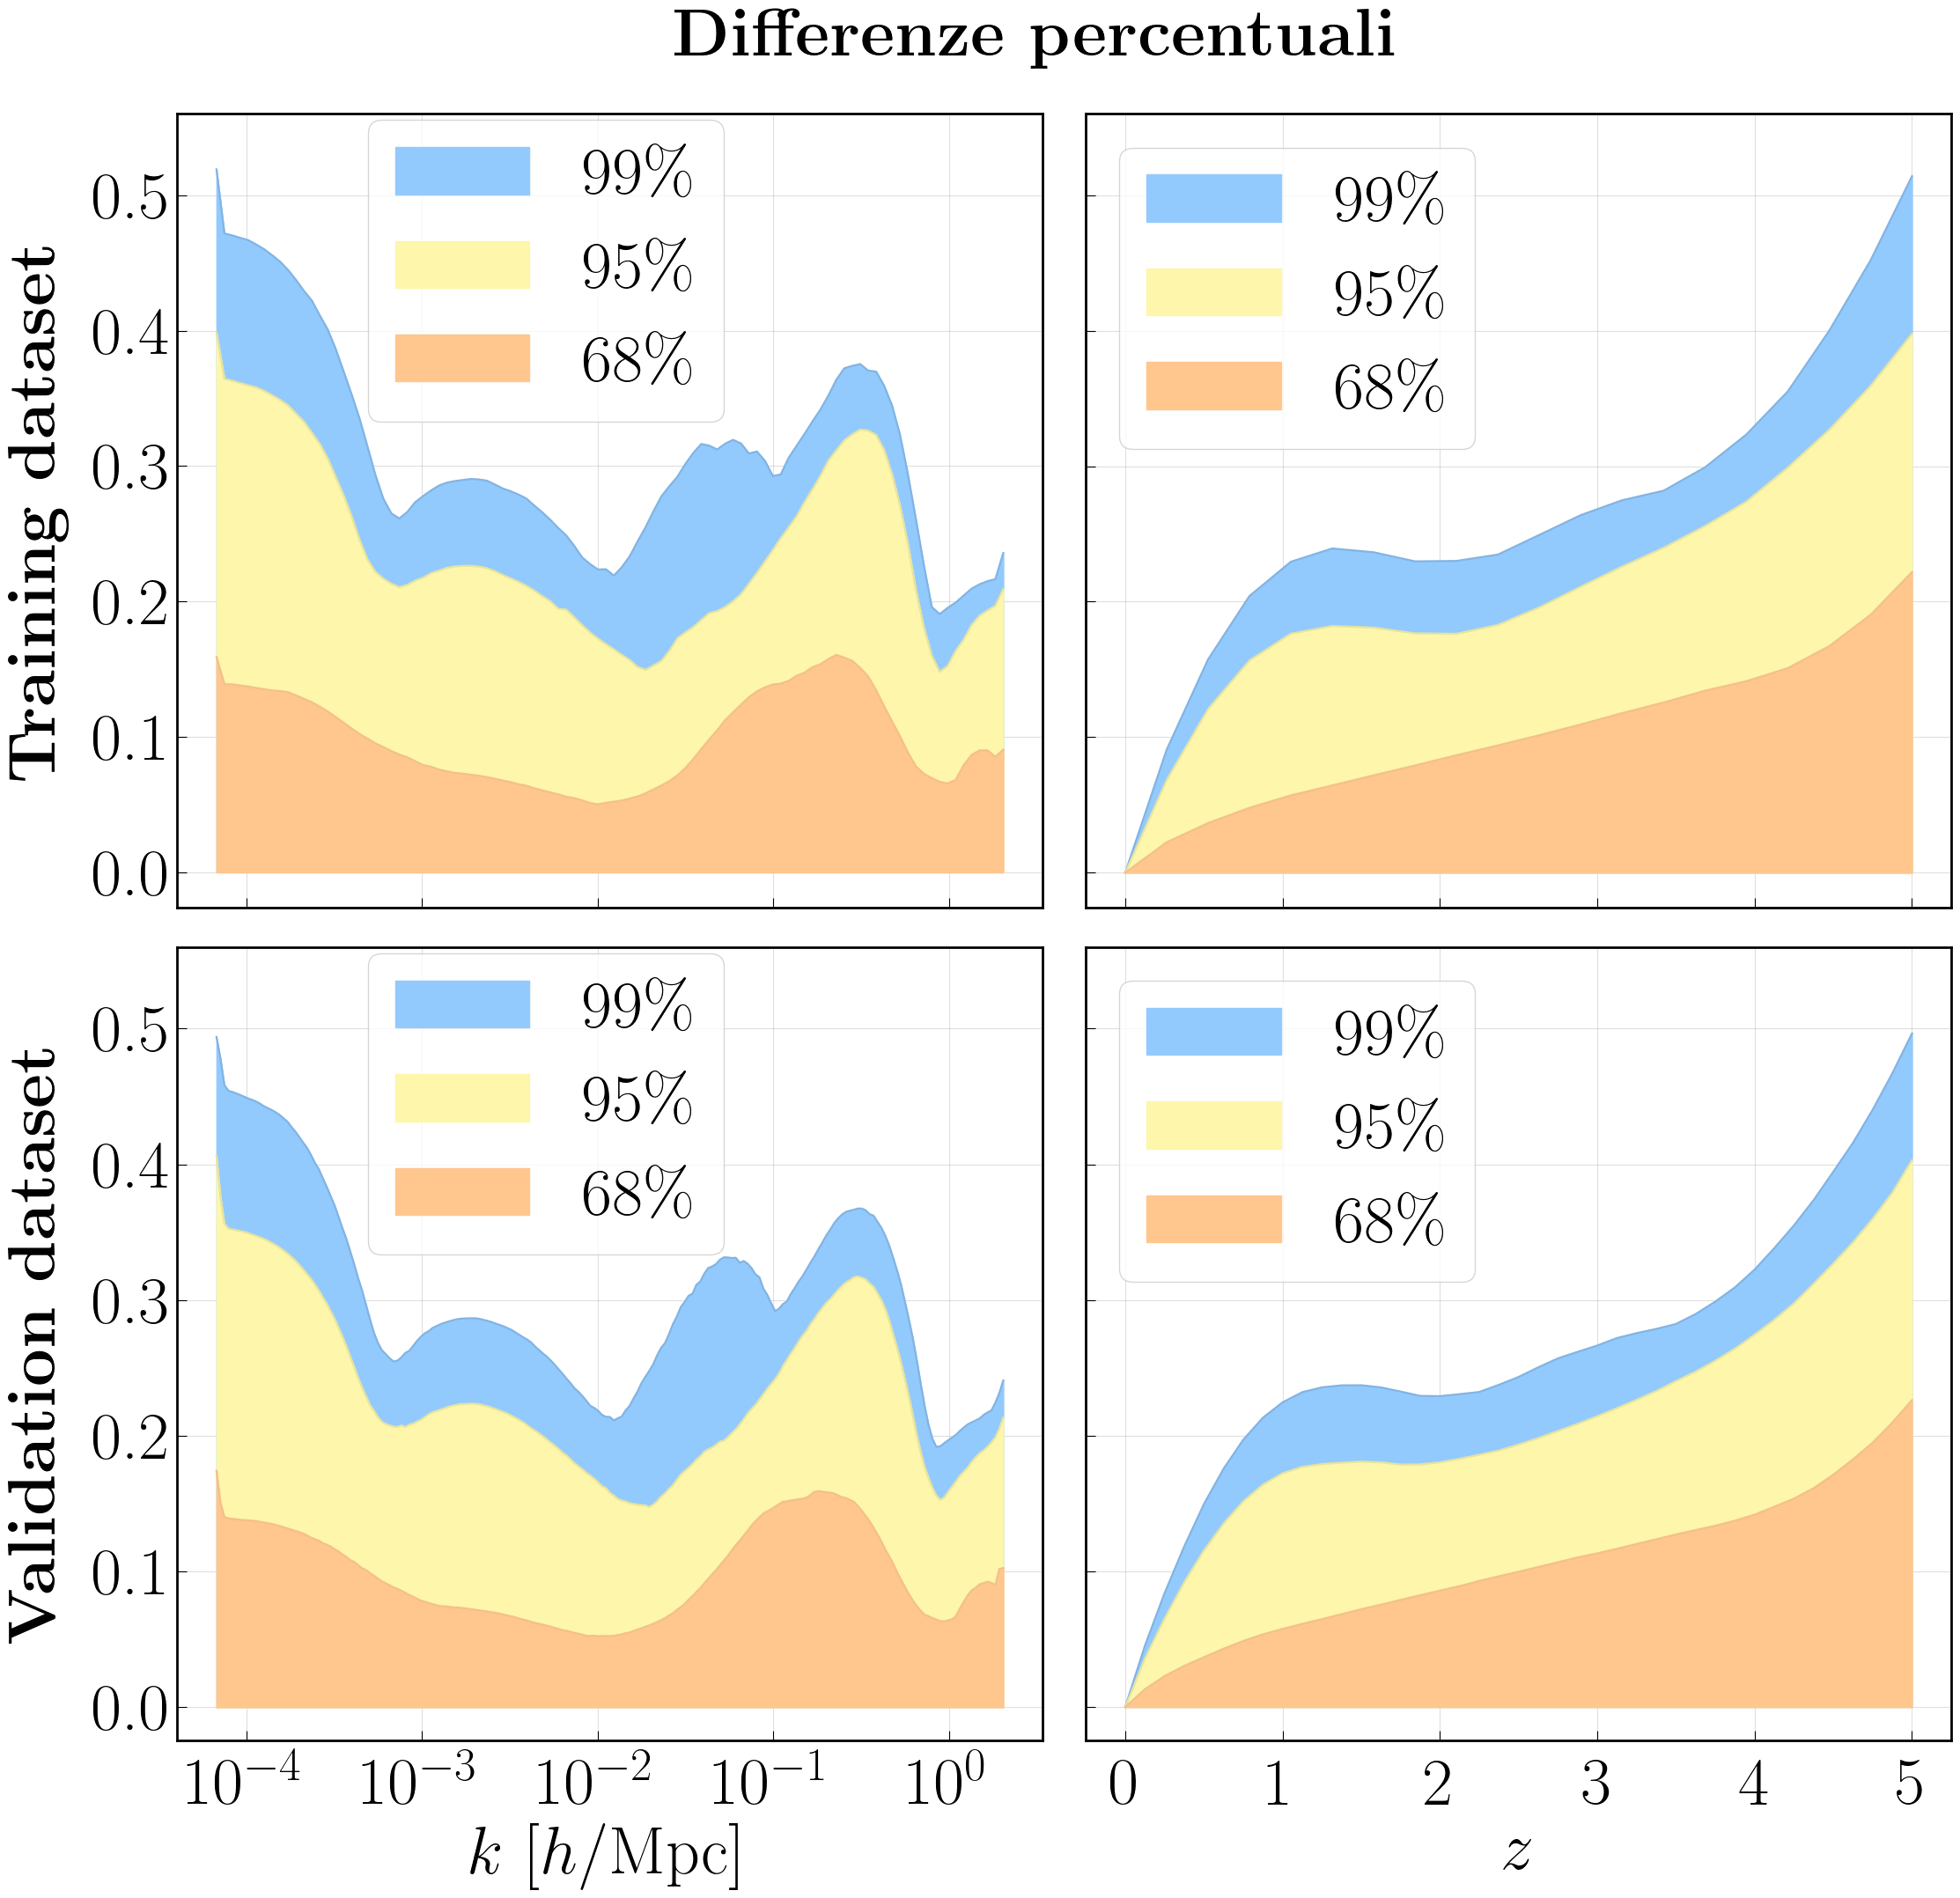

In [804]:
fig, axs = plt.subplots(2, 2, figsize=(26, 24), gridspec_kw={'hspace':  0.05, 'wspace': 0.05})

x = [[kk, zz], [kkv, zzv]]
diff = [[diffk_VBCh_2, diffz_VBCh_2], [diffk_VBCh_v2, diffz_VBCh_v2]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diff[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diff[i][j][ind99,:], color='#82B4E3')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind99,:], color='#93CAFD', label='$99\%$')

        ind95 = int((diff[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diff[i][j][ind95,:], color='#E7E39E')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind95,:], label='$95\%$', color='#FDF6AB')

        ind68 = int((diff[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diff[i][j][ind68,:], color='#F4C08B')
        axs[i,j].fill_between(x[i][j], diff[i][j][ind68,:], label='$68\%$', color='#FFC68E')

        axs[i,j].legend()
        axs[0,0].legend(bbox_to_anchor=(0.67, 0.57))
        axs[1,0].legend(bbox_to_anchor=(0.67, 0.57))

        #axs[0,j].set_title(r'Differenze con training dataset', pad=12)
        #axs[1,j].set_title(r'Differenze con validation dataset', pad=12)
        
        axs[i,0].set_xscale('log')
        axs[i,j].set_ylim(axs[i,j].get_ylim()[0], 0.56)
        axs[0,j].set_xticklabels([])
        axs[i,j].set_yticks(np.linspace(0.0, 0.5, 6), np.around(np.linspace(0.0, 0.5, 6), 1))
        axs[i,1].set_yticklabels([])
        axs[i,0].set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0])
        axs[1,0].set_xticklabels(['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
        axs[i,1].set_xticks([0,1,2,3,4,5])
        axs[1,1].set_xticklabels([0,1,2,3,4,5])

        axs[i,j].grid(linestyle='-', alpha=0.4)
        axs[i,j].set_axisbelow(True)

axs[1,0].set_xlabel('$k$ [$h$/Mpc]')
axs[1,1].set_xlabel('$z$')

axs[0,0].set_ylabel(r'\textbf{Training dataset}', labelpad=20)
axs[1,0].set_ylabel(r'\textbf{Validation dataset}', labelpad=20)

fig.suptitle(r'\textbf{Differenze percentuali}', x=0.5, y=0.93, fontsize=size)

plt.savefig('../plots/diff_mu.pdf')
plt.show()

## Differenze $P(k,z)$

In [794]:
nc = 2000
ncv = 1000

In [795]:
# parametri nn+sr - training dataset

prim = np.load('../files/train_prim_emul_' + str(nc) + '.npy')
print('Dim spettro primordiale: ', prim.shape)

tf2 = np.load('../files/train_tf2_emul_' + str(nc) + '.npy')
print('Dim transfer: ', tf2.shape)

print()

pred= np.load('../files/pred_nn+sr_' + str(nc) + '.npy')
print('Dim predizione: ', pred.shape)

pkz_class = np.load('../files/train_pkz_emul_' + str(nc) + '.npy')
pkz_class = np.reshape(pkz_class, [nc,nk*nz]).T
print('Dim spettro CLASS: ', pkz_class.shape)

mu2 = np.load('../files/train_mu2_emul_' + str(nc) + '.npy')
mu2 = np.reshape(mu2, [nc,nk*nz]).T
print('Dim mu: ', mu2.shape)

pkz_prim = np.zeros([nc,nk,nz])
transfer2 = np.zeros([nc,nk,nz])
for i in range(nz) :
    pkz_prim[:,:,i] = prim
    transfer2[:,:,i] = tf2
pkz_prim = np.reshape(pkz_prim, [nc,nk*nz]).T
transfer2 = np.reshape(transfer2, [nc,nk*nz]).T
print('Dim transfer aggiustata: ', transfer2.shape)
print('Dim primordiale aggiustata: ', pkz_prim.shape)

pkz_pred = pred * pkz_prim * transfer2 * mu2
print('Dim spettro predetto: ', pkz_pred.shape)

Dim spettro primordiale:  (2000, 100)
Dim transfer:  (2000, 100)

Dim predizione:  (2000, 2000)
Dim spettro CLASS:  (2000, 2000)
Dim mu:  (2000, 2000)
Dim transfer aggiustata:  (2000, 2000)
Dim primordiale aggiustata:  (2000, 2000)
Dim spettro predetto:  (2000, 2000)


In [796]:
# parametri nn - training dataset

pkz_class_nn = np.load('../files/train_pkz_asns_emul_' + str(nc) + '.npy')
print('Dim spettro CLASS: ', pkz_class_nn.shape)
pkz_class_nn = np.reshape(pkz_class_nn, [nc,nk*nz]).T

pkz_pred_nn = np.load('../files/pred_nn_asns_' + str(nc) + '.npy')
print('Dim predizione: ', pkz_pred_nn.shape)

Dim spettro CLASS:  (2000, 100, 20)
Dim predizione:  (2000, 2000)


In [797]:
# parametri nn+sr - validation dataset

prim_v = np.load('../files/val_prim_emul_' + str(ncv) + '.npy')
print('Dim spettro primordiale: ', prim_v.shape)

tf2_v = np.load('../files/val_tf2_emul_' + str(ncv) + '.npy')
print('Dim transfer: ', tf2_v.shape)

print()

pred_v= np.load('../files/pred_nn+sr_val_' + str(ncv) + '.npy')
print('Dim predizione: ', pred_v.shape)

pkz_class_v = np.load('../files/val_pkz_emul_' + str(ncv) + '.npy')
pkz_class_v = np.reshape(pkz_class_v, [ncv,nk*nz]).T
print('Dim spettro CLASS: ', pkz_class_v.shape)

mu2_v = np.load('../files/val_mu2_emul_' + str(ncv) + '.npy')
mu2_v = np.reshape(mu2_v, [ncv,nk*nz]).T
print('Dim mu: ', mu2_v.shape)

pkz_prim_v = np.zeros([ncv,nk,nz])
transfer2_v = np.zeros([ncv,nk,nz])
for i in range(nz) :
    pkz_prim_v[:,:,i] = prim_v
    transfer2_v[:,:,i] = tf2_v
pkz_prim_v = np.reshape(pkz_prim_v, [ncv,nk*nz]).T
transfer2_v = np.reshape(transfer2_v, [ncv,nk*nz]).T
print('Dim transfer aggiustata: ', transfer2_v.shape)
print('Dim primordiale aggiustata: ', pkz_prim_v.shape)

pkz_pred_v = pred_v * pkz_prim_v * transfer2_v * mu2_v
print('Dim spettro predetto: ', pkz_pred_v.shape)

Dim spettro primordiale:  (1000, 100)
Dim transfer:  (1000, 100)

Dim predizione:  (2000, 1000)
Dim spettro CLASS:  (2000, 1000)
Dim mu:  (2000, 1000)
Dim transfer aggiustata:  (2000, 1000)
Dim primordiale aggiustata:  (2000, 1000)
Dim spettro predetto:  (2000, 1000)


In [798]:
# parametri nn - validation dataset

pkz_class_nn_v = np.load('../files/val_pkz_asns_emul_' + str(ncv) + '.npy')
pkz_class_nn_v = np.reshape(pkz_class_nn_v, [ncv,nk*nz]).T
print('Dim spettro CLASS: ', pkz_class_nn_v.shape)

pkz_pred_nn_v = np.load('../files/pred_nn_asns_val_' + str(ncv) + '.npy')
print('Dim predizione: ', pkz_pred_nn_v.shape)


Dim spettro CLASS:  (2000, 1000)
Dim predizione:  (2000, 1000)


In [799]:
# preparo il plot delle differenze percentuali con il training dataset

diffk = np.zeros([nc*nz,nk])
diffz = np.zeros([nc*nk,nz])

for i in range(nk) :
    start = i * nz
    stop = i * nz + nz
    diffk[:,i] = np.reshape(100 * np.abs(1 - pkz_pred[start:stop,:] / pkz_class[start:stop,:]), [nc*nz])
diffk = np.sort(diffk, axis=0)

for i in range(nz) :
    diffz[:,i] = np.reshape(100 * np.abs(1 - pkz_pred[i:nk*nz:nz,:] / pkz_class[i:nk*nz:nz,:]), [nc*nk])
diffz = np.sort(diffz, axis=0)

In [800]:
# preparo il plot delle differenze percentuali con il validation dataset

diffk_v = np.zeros([ncv*nz,nk])
diffz_v = np.zeros([ncv*nk,nz])

for i in range(nk) :
    start = i * nz
    stop = i * nz + nz
    diffk_v[:,i] = np.reshape(100 * np.abs(1 - pkz_pred_v[start:stop,:] / pkz_class_v[start:stop,:]), [ncv*nz])
diffk_v = np.sort(diffk_v, axis=0)

for i in range(nz) :
    diffz_v[:,i] = np.reshape(100 * np.abs(1 - pkz_pred_v[i:nk*nz:nz,:] / pkz_class_v[i:nk*nz:nz,:]), [ncv*nk])
diffz_v = np.sort(diffz_v, axis=0)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/ll/brfzdrlx3nndb4spv5812khr0000gn/T/ipykernel_10785/1133132512.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
/var/folders/ll/brfzdrlx3nndb4spv5812khr0000gn/T/ipykernel_10785/1133132512.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,1].set_xticklabels([0,1,2,3,4,5])
/var/folders/ll/brfzdrlx3nndb4spv5812khr0000gn/T/ipykernel_10785/1133132512.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1,0].set_xticklabels(['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1

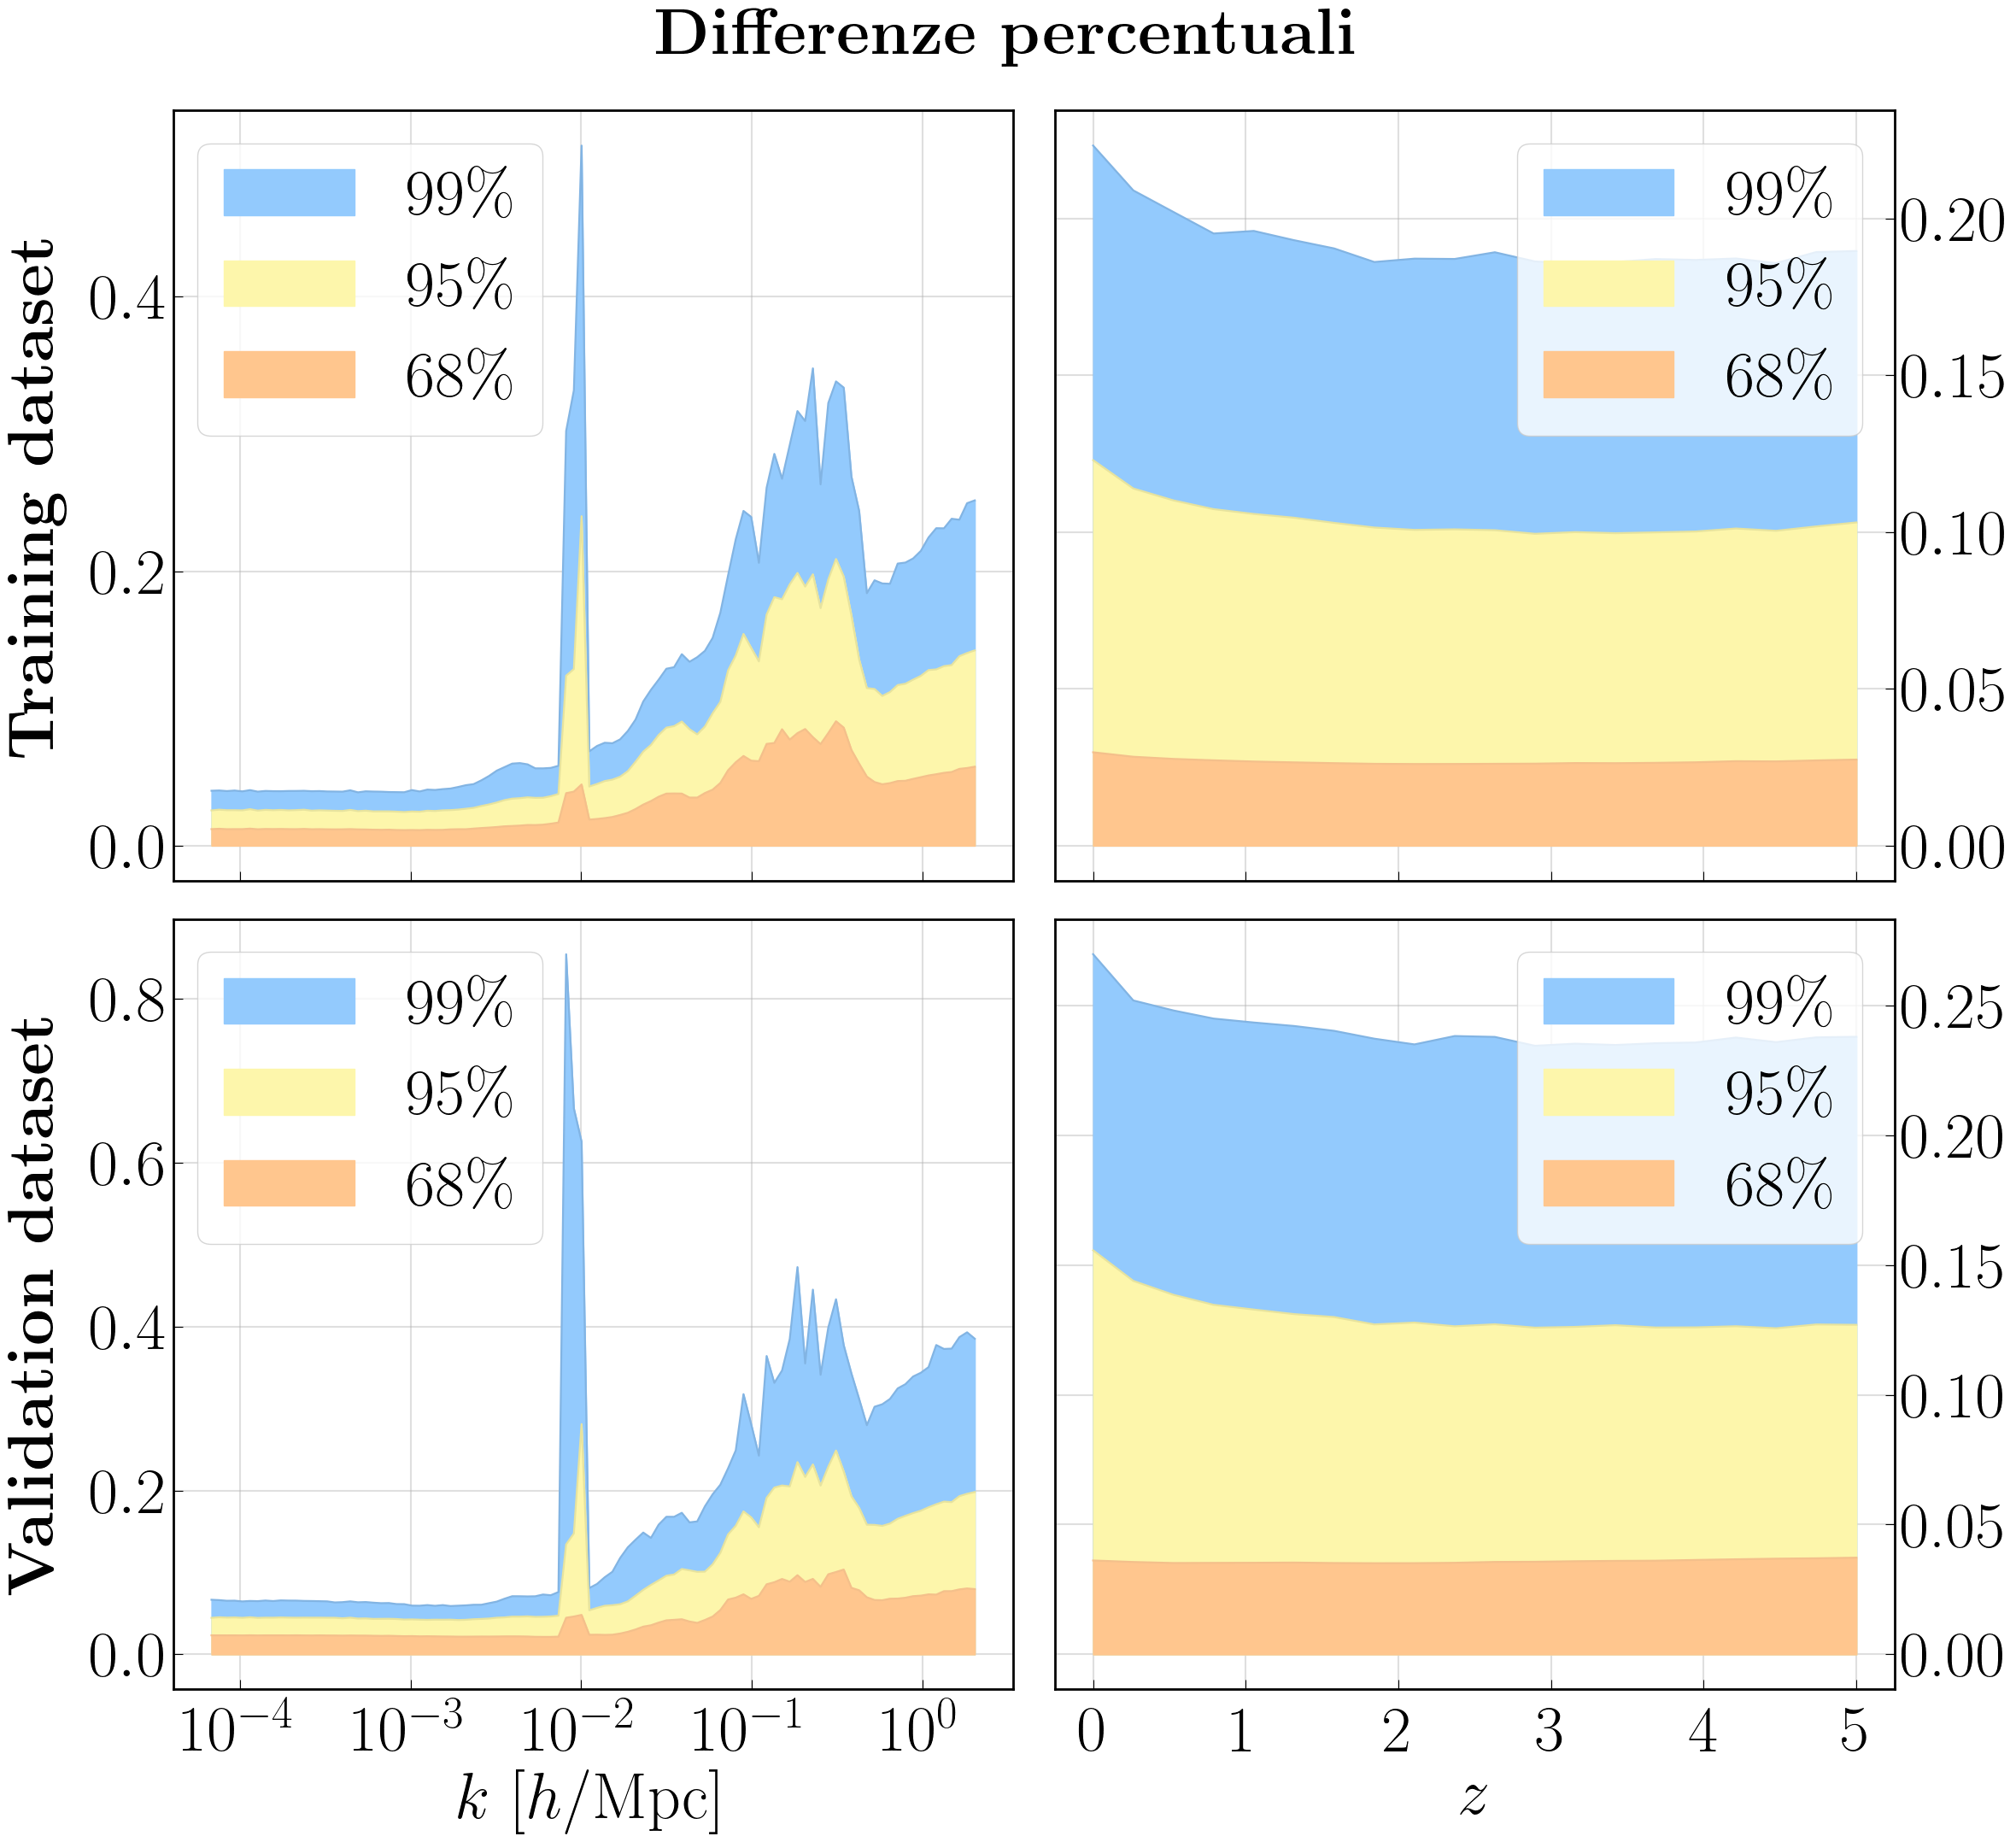

In [803]:
fig, axs = plt.subplots(2, 2, figsize=(26, 24), gridspec_kw={'hspace': 0.05, 'wspace': 0.05})

x = [[kk, zz], [kk, zz]]
diffs = [[diffk, diffz], [diffk_v, diffz_v]]

for i in range(2) :
    for j in range(2) :
        ind99 = int((diffs[i][j].shape[0]/100)*99)
        axs[i,j].plot(x[i][j], diffs[i][j][ind99,:], color='#82B4E3')
        axs[i,j].fill_between(x[i][j], diffs[i][j][ind99,:], color='#93CAFD', label='$99\%$')

        ind95 = int((diffs[i][j].shape[0]/100)*95)
        axs[i,j].plot(x[i][j], diffs[i][j][ind95,:], color='#E7E39E')
        axs[i,j].fill_between(x[i][j], diffs[i][j][ind95,:], label='$95\%$', color='#FDF6AB')

        ind68 = int((diffs[i][j].shape[0]/100)*68)
        axs[i,j].plot(x[i][j], diffs[i][j][ind68,:], color='#F4C08B')
        axs[i,j].fill_between(x[i][j], diffs[i][j][ind68,:], label='$68\%$', color='#FFC68E')

        axs[i,0].legend(loc='upper left', bbox_to_anchor=(-0.01,1))
        axs[i,1].legend(loc='upper right')

        #axs[0,j].set_title(r'Differenze con training dataset', pad=12)
        #axs[1,j].set_title(r'Differenze con validation dataset', pad=12)
        
        axs[i,0].set_xscale('log')
        axs[0,j].set_xticklabels([])
        axs[i,1].tick_params(axis='y', left=False, right=True, labelleft=False, labelright=True)
        axs[1,1].set_yticks(np.linspace(0.00, 0.25, 6), ['0.00','0.05','0.10','0.15','0.20','0.25'])
        axs[i,0].set_xticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0])
        axs[1,0].set_xticklabels(['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
        axs[i,1].set_xticks([0,1,2,3,4,5])
        axs[1,1].set_xticklabels([0,1,2,3,4,5])

        #axs[i,j].grid(which='both', linestyle='-', alpha=1)
        axs[i,j].grid(which='major', linestyle='-', linewidth=1.5, alpha=0.4)
        axs[i,j].grid(which='minor', linestyle='-', linewidth=1.5, alpha=0.4)
        axs[i,j].set_axisbelow(True)


axs[1,0].set_xlabel('$k$ [$h$/Mpc]')
axs[1,1].set_xlabel('$z$')

axs[0,0].set_ylabel(r'\textbf{Training dataset}', labelpad=20)
axs[1,0].set_ylabel(r'\textbf{Validation dataset}', labelpad=20)

fig.suptitle(r'\textbf{Differenze percentuali}', x=0.5, y=0.93, fontsize=size)

plt.savefig('../plots/diff_pkz.pdf')
plt.show()